Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 311
Code Title: | Computational Thinking with Python
Summer | 2024
<hr></hr> | <hr></hr>
<u>**Hands-on Activity No. 9.1**</u> | <u>**Data Visualization using Pandas and Matplotlib**</u>
**Name** | Sumilang, Kenneth
**Section** | CPE32S1
**Date Performed**: | 7/9/24
**Date Submitted**: | 7/9/24
**Instructor**: |Engr. Roman M. Richard


## 9.1.1 Introducing Matplotlib





#### Getting Started with Matplotlib

We need `matplotlib.pyplot` for plotting.

#### About the Data

In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the `stock_analysis` package)
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

#### Plotting Lines


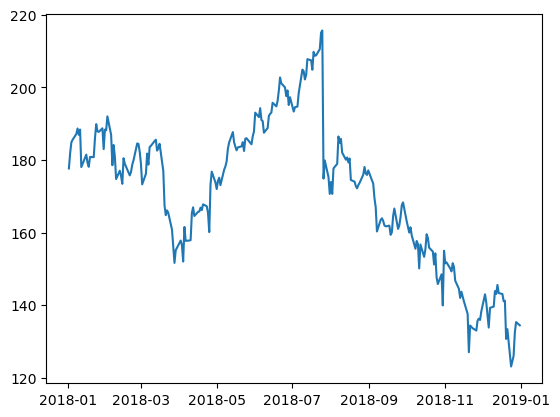

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load Facebook stock price data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Plot the data
plt.plot(fb.index, fb.open)
plt.show()


Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

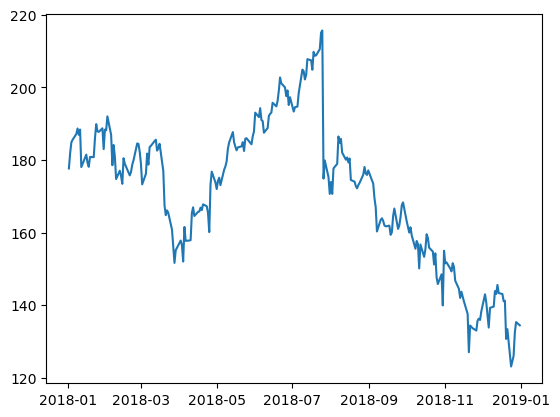

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
plt.plot(fb.index, fb.open)


#### Scatter Plots

We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with `'k--'` or a red scatter plot with `'ro'`:


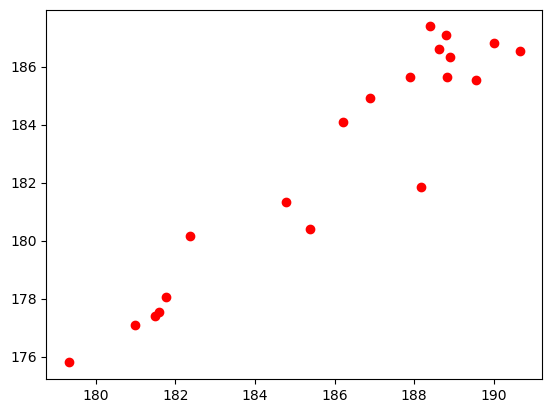

In [6]:
plt.plot('high', 'low', 'ro', data=fb.head(20))

#### Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

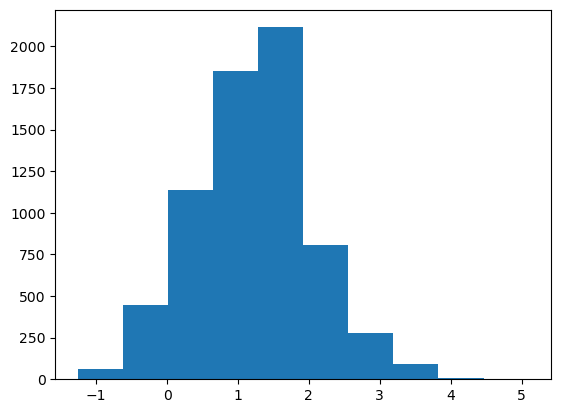

In [8]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)


Bin size matters. Notice how our assumptions of the distribution of the data can change based on the number of bins:

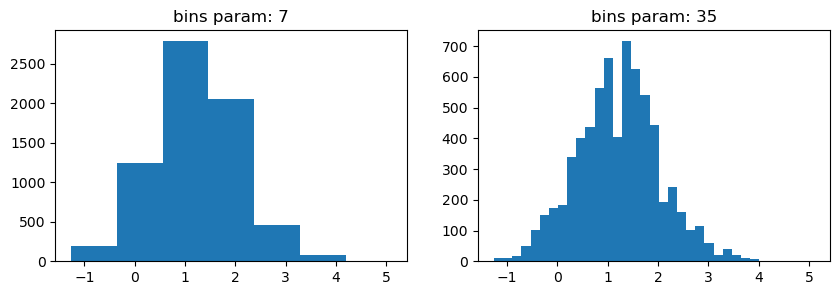

In [9]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')


#### Plot Components

##### Figure

Top-level object that holds the other plot components.

##### Axes
Individual plots contained within the Figure.

##### Creating Subplots
Simply specify the number of rows and columns to create:


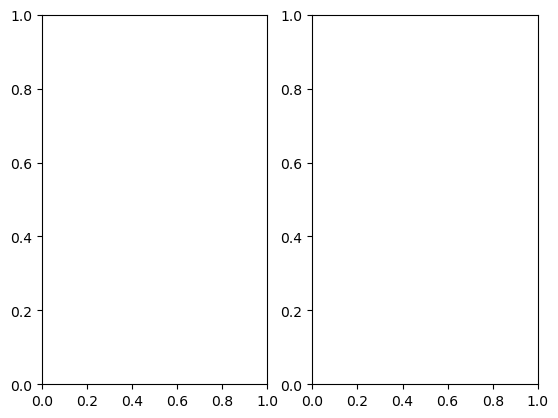

In [10]:
fig, axes = plt.subplots(1, 2)

As an alternative to using plt.subplots(), we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture:

### Creating Plot Layouts with Gridspec
We can create subplots with varying sizes as well:

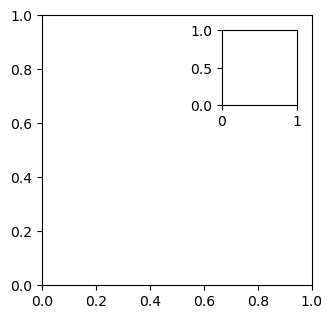

In [11]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])


#### Saving Plots
Use `plt.savefig()` to save the last created plot. To save a specific Figure object, use its `savefig()` method.



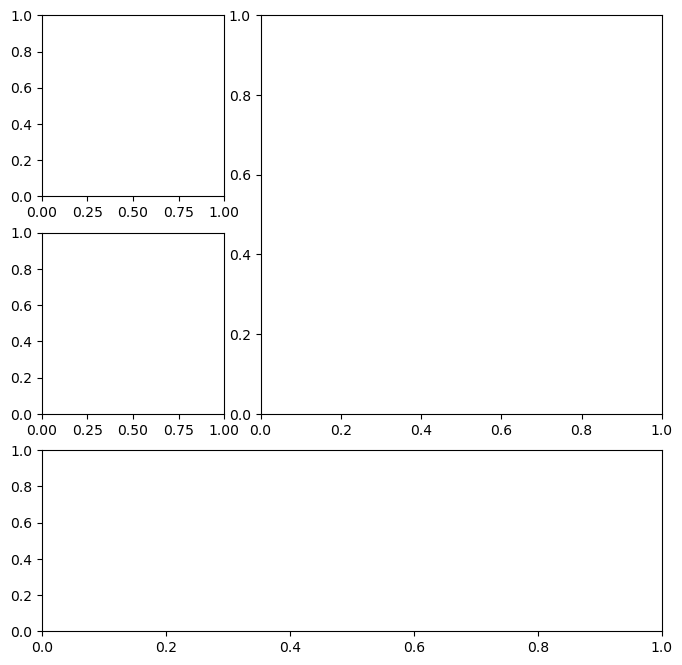

In [12]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])

fig.savefig('empty.png')


#### Cleaning Up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass the specific Figure to close or say 'all' to close all Figure objects that are open.

#### Additional Plotting Options
Specifying Figure Size
Just pass the figsize parameter to `plt.figure()`. It's a tuple of `(width, height)`:

<Figure size 1000x400 with 0 Axes>

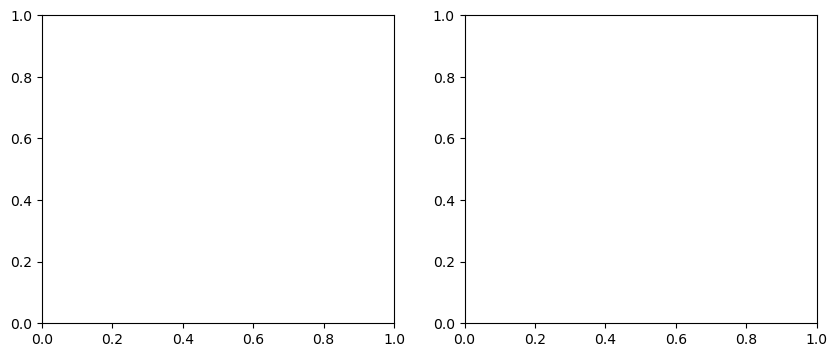

In [13]:
fig = plt.figure(figsize=(10, 4))
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


`rcParams`


We can check the current default `figsize` using `rcParams`:

In [14]:
import matplotlib as mpl
import random

rcparams_list = list(mpl.rcParams.keys())
random.seed(20)  # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']


[300.0, 10.0]

Use `rcdefaults()` to restore the defaults:



In [15]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']


[6.4, 4.8]

This can also be done via `pyplot`:



In [16]:
plt.rc('figure', figsize=(20, 20))  # change figsize default to (20, 20)
plt.rcdefaults()  # reset the default


# 9.1.2 Plotting with Pandas






The `plot()` method is available on `Series` and `DataFrame` objects. Many of the parameters get passed down to `matplotlib`. The `kind` argument lets us vary the plot type.

## About the Data

In this notebook, we will be working with 2 datasets:
- Facebook's stock price throughout 2018 (obtained using the `stock_analysis` package)
- Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)

## Setup

### Evolution over Time

Line plots help us see how a variable changes over time. They are the default for the `kind` argument, but we can pass `kind='line'` to be explicit in our intent:



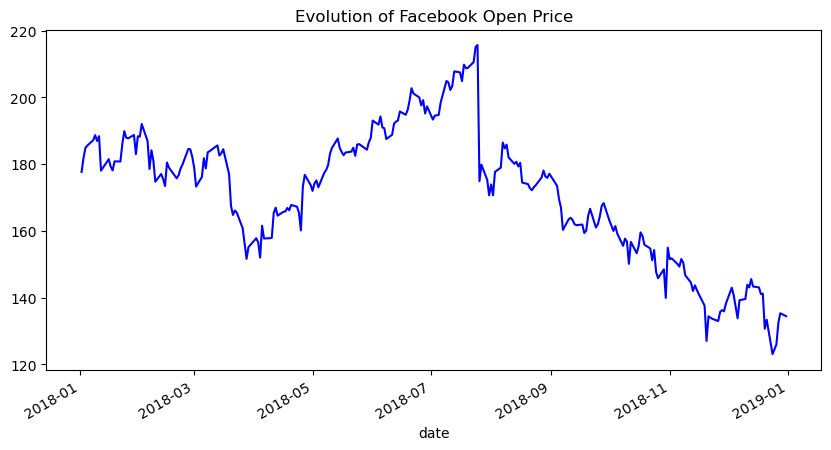

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')

# Plot Facebook stock prices
fb.plot(kind='line', y='open', figsize=(10, 5), style='b-', legend=False, title='Evolution of Facebook Open Price')
plt.show()




For more information: [Stock Analysis](https://github.com/stefmolin/stock-analysis) | [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/)

We can also use the `color` and `linestyle` arguments to get the same result:


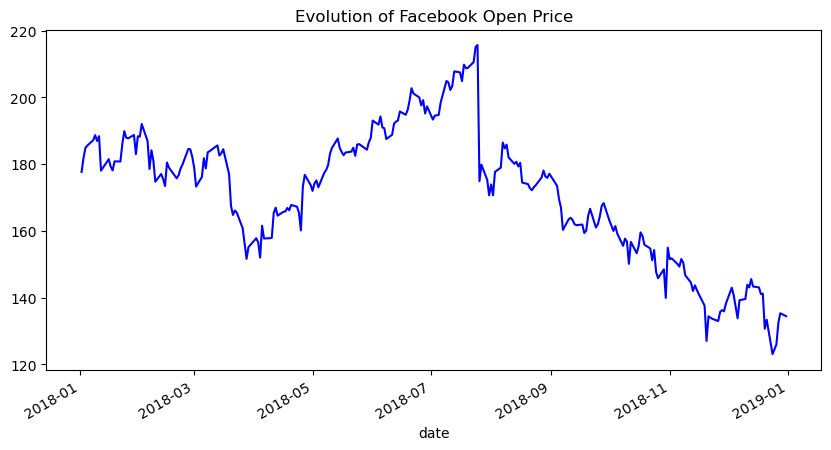

In [19]:

fb.plot(kind='line', y='open', figsize=(10, 5), color='blue', linestyle='solid', legend=False, title='Evolution of Facebook Open Price')
plt.show()


We can also plot many lines at once by simply passing a list of the columns to plot:

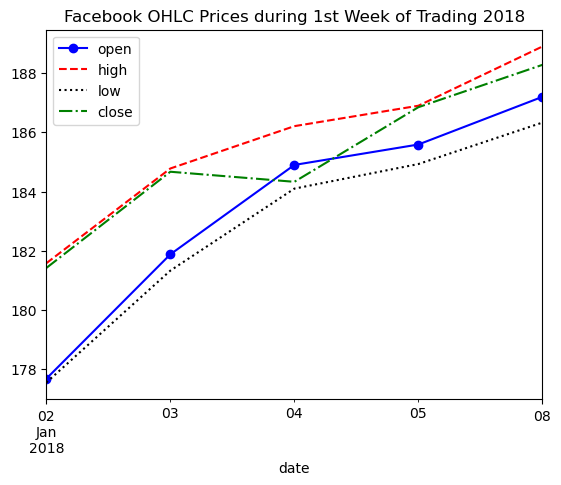

In [22]:
fb.iloc[:5,].plot(y=['open', 'high', 'low', 'close'], style=['b-o', 'r--', 'k:', 'g-.'], title='Facebook OHLC Prices during 1st Week of Trading 2018')
plt.show()

### Creating Subplots

When plotting with pandas, creating subplots is simply a matter of passing `subplots=True` to the `plot()` method, and (optionally) specifying the `layout` in a tuple of (rows, columns):



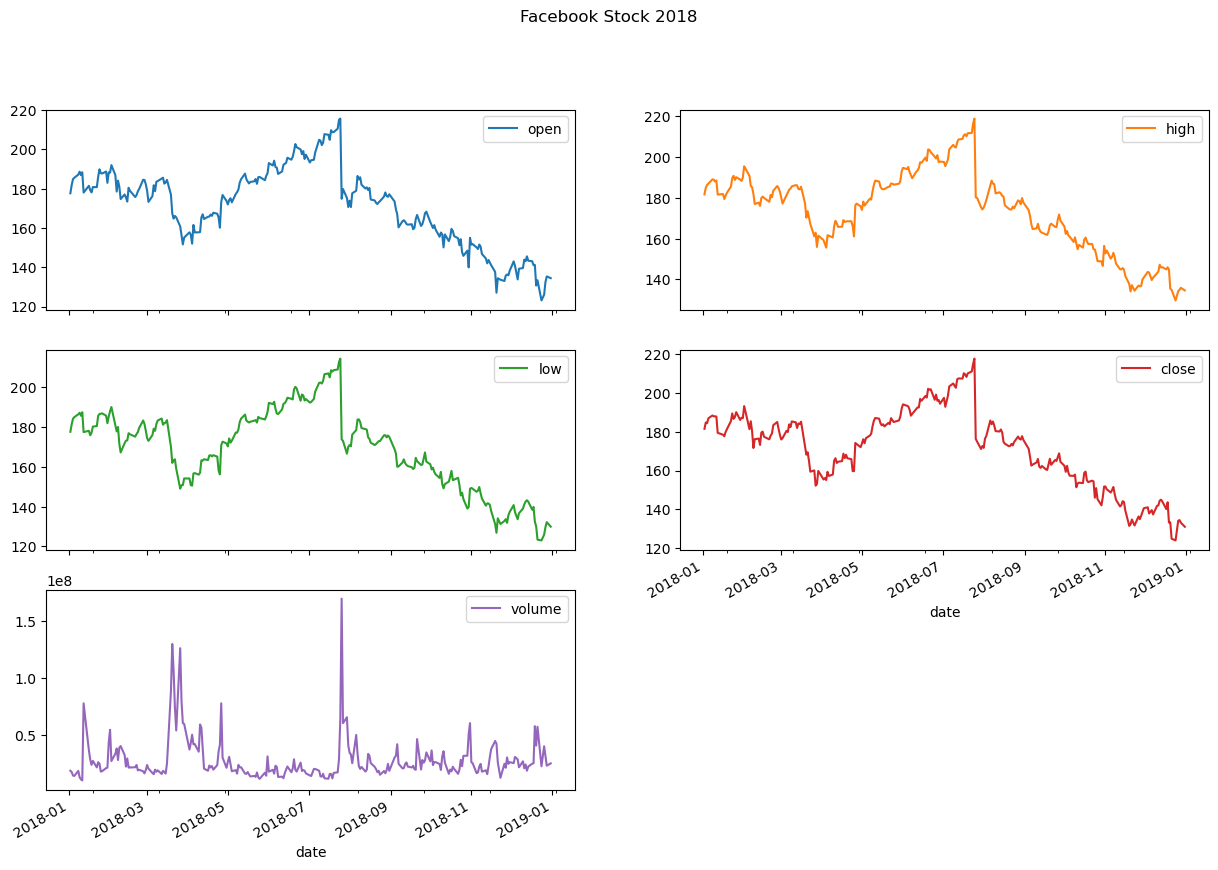

In [23]:
fb.plot(kind='line', subplots=True, layout=(3, 2), figsize=(15, 10), title='Facebook Stock 2018')
plt.show()

Note that we didn't provide a specific column to plot and pandas plotted all of them for us.

### Visualizing Relationships Between Variables

#### Scatter Plots

We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in `kind='scatter'` along with a column for the x-axis and a column for the y-axis:


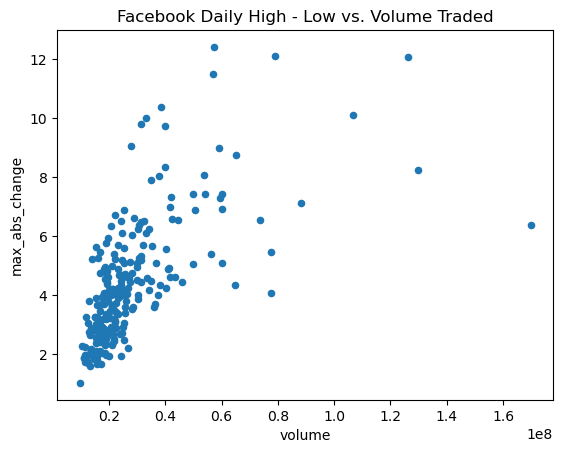

In [24]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. Volume Traded')
plt.show()


The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in `logx=True`:


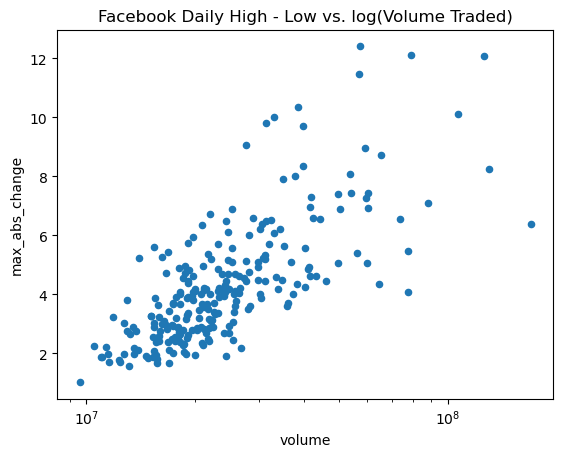

In [25]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', logx=True)
plt.show()

With matplotlib, we could use `plt.xscale('log')` to do the same thing.

#### Adding Transparency to Plots with alpha

Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the `alpha` parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot:

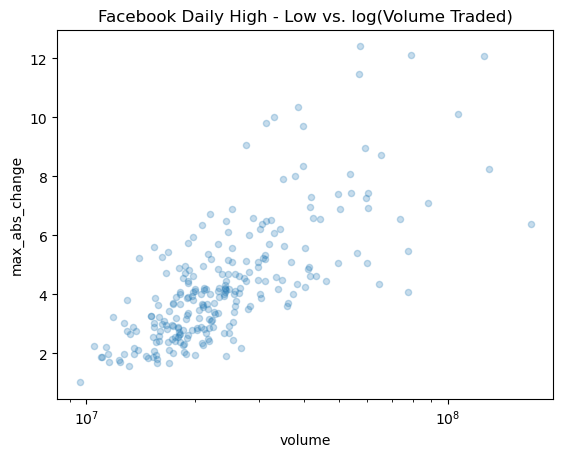

In [26]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', logx=True, alpha=0.25)
plt.show()


#### Hexbins

Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With pandas, this is the `hexbin` value for the `kind` argument. It can also be important to tweak the `gridsize`, which determines the number of hexagons along the y-axis:


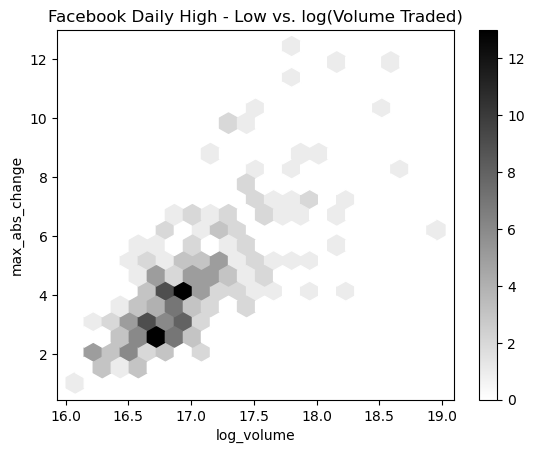

In [28]:
fb.assign(log_volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).plot(kind='hexbin', x='log_volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', colormap='gray_r', gridsize=20, sharex=False)
plt.show()

#### Visualizing Correlations with Heatmaps

Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use `matshow()` from matplotlib:


AttributeError: 'Colorbar' object has no attribute 'set_clim'

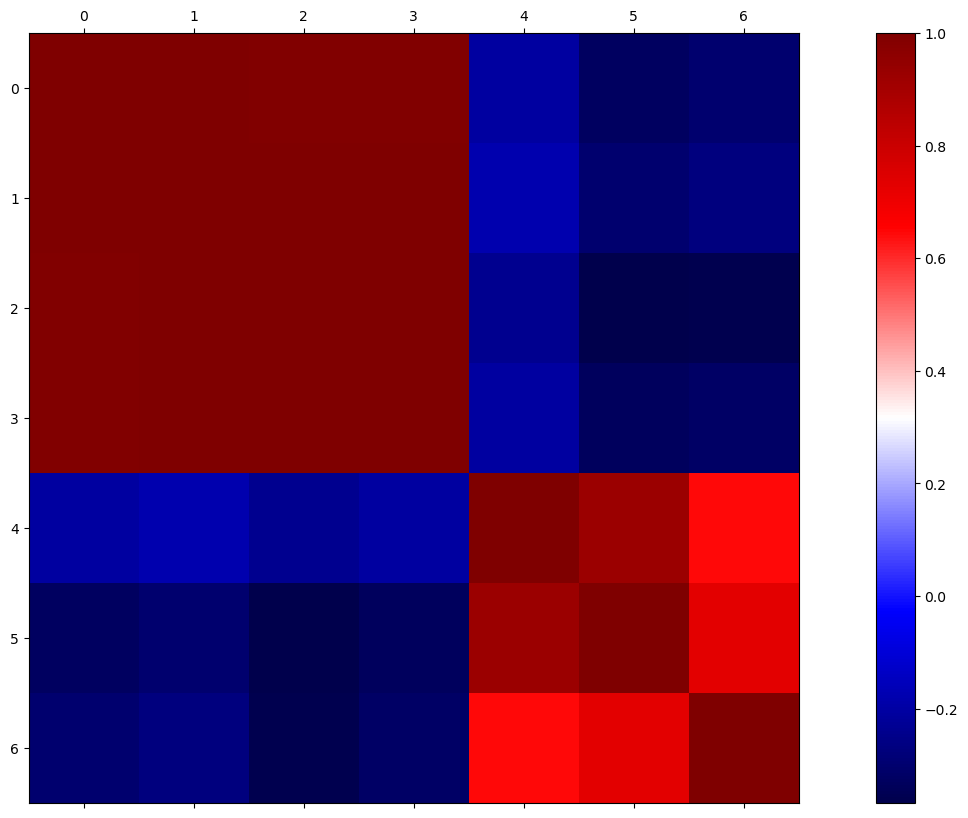

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(log_volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr()
im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im).set_clim(-1, 1)
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)
plt.show()

### Visualizing Distributions

#### Histograms

With the pandas `plot()` method, making histograms is as easy as passing in `kind='hist'`:



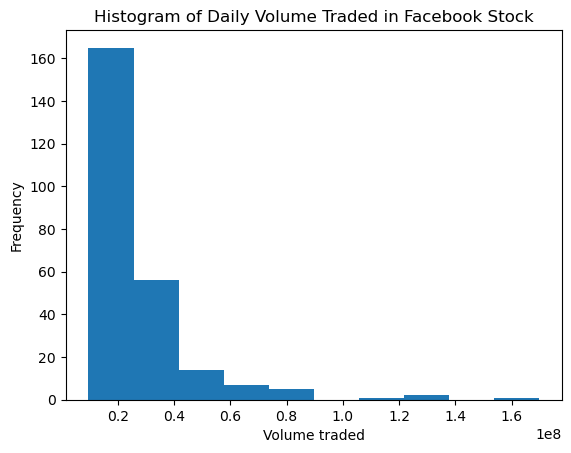

In [31]:
fb.volume.plot(kind='hist', title='Histogram of Daily Volume Traded in Facebook Stock')
plt.xlabel('Volume traded')  # label the x-axis
plt.show()


We can overlap histograms to compare distributions provided we use the `alpha` parameter. For example, let's compare the usage and magnitude of the various `magTypes` in the data:


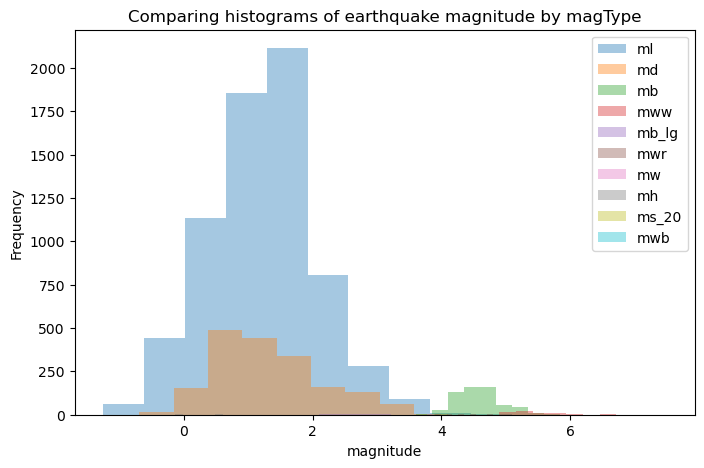

In [32]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(kind='hist', ax=axes, alpha=0.4, label=magtype, legend=True, title='Comparing histograms of earthquake magnitude by magType')
plt.xlabel('magnitude')  # label the x-axis
plt.show()

#### Kernel Density Estimation (KDE)

We can pass `kind='kde'` for a probability density function (PDF), which tells us the probability of getting a particular value:


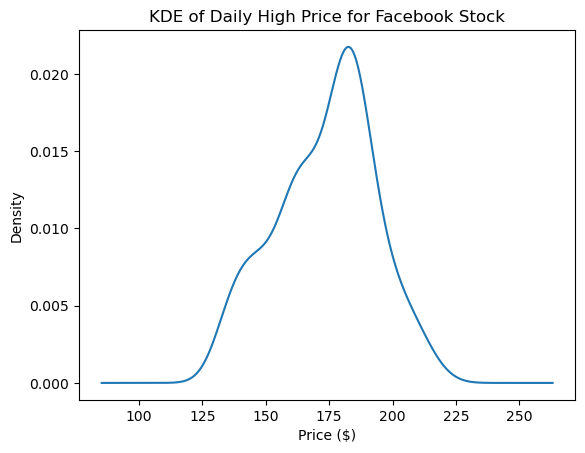

In [33]:
fb.high.plot(kind='kde', title='KDE of Daily High Price for Facebook Stock')
plt.xlabel('Price ($)')  # label the x-axis
plt.show()

#### Adding to the Result of `plot()`

The `plot()` method returns a matplotlib `Axes` object. We can store this for additional customization of the plot, or we can pass this into another call to `plot()` as the `ax` argument to add to the original plot.

It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:


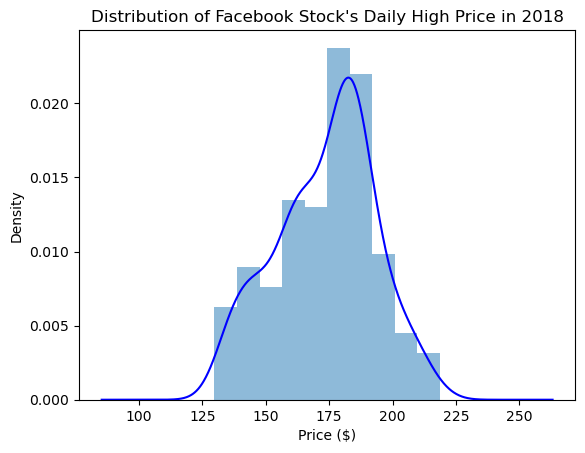

In [34]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(ax=ax, kind='kde', color='blue', title="Distribution of Facebook Stock's Daily High Price in 2018")
plt.xlabel('Price ($)')  # label the x-axis
plt.show()


#### Plotting the ECDF

In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative distribution function (CDF). Using the `statsmodels` package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF):



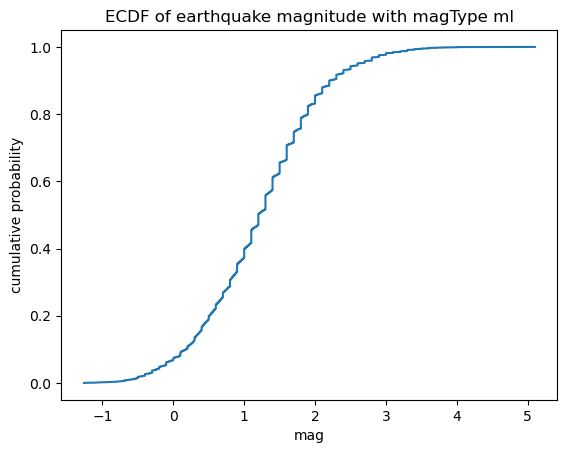

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
plt.xlabel('mag')  # add x-axis label
plt.ylabel('cumulative probability')  # add y-axis label
plt.title('ECDF of earthquake magnitude with magType ml')
plt.show()


This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the `ml` scale is 98%:

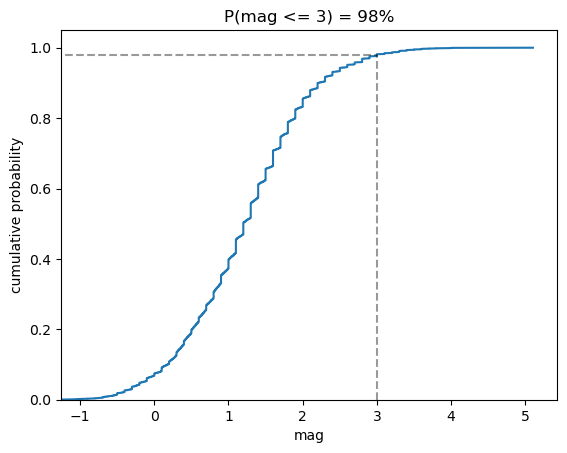

In [37]:
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# Formatting below will all be covered in chapter 6
# Axis labels
plt.xlabel('mag')  # add x-axis label
plt.ylabel('cumulative probability')  # add y-axis label
# Add reference lines for interpreting the ECDF for mag <= 3
plt.plot([3, 3], [0, .98], 'k--', [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4)
# Set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# Add a title
plt.title('P(mag <= 3) = 98%')
plt.show()


### Box Plots

To make box plots with pandas, we pass `kind='box'` to the `plot()` method:


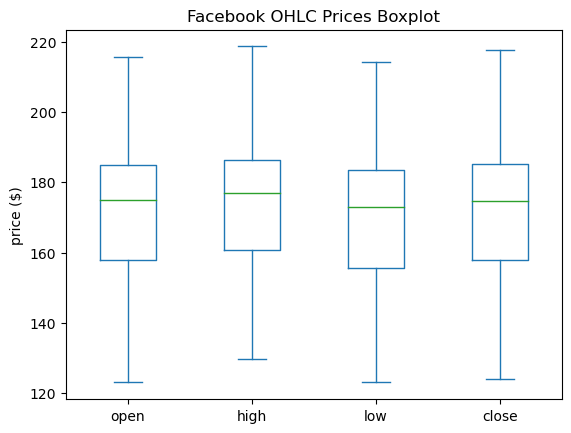

In [38]:
fb.iloc[:, :4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)')  # label the y-axis
plt.show()


This can also be combined with a `groupby()`:

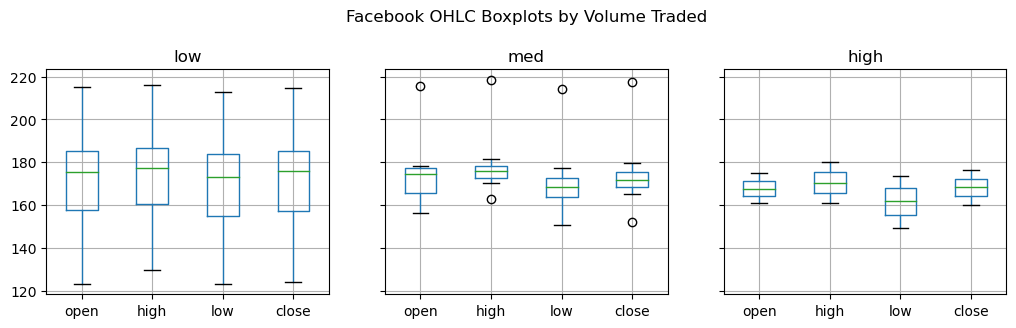

In [39]:
fb.assign(volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])).groupby('volume_bin').boxplot(column=['open', 'high', 'low', 'close'], layout=(1, 3), figsize=(12, 3))
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)
plt.show()


We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

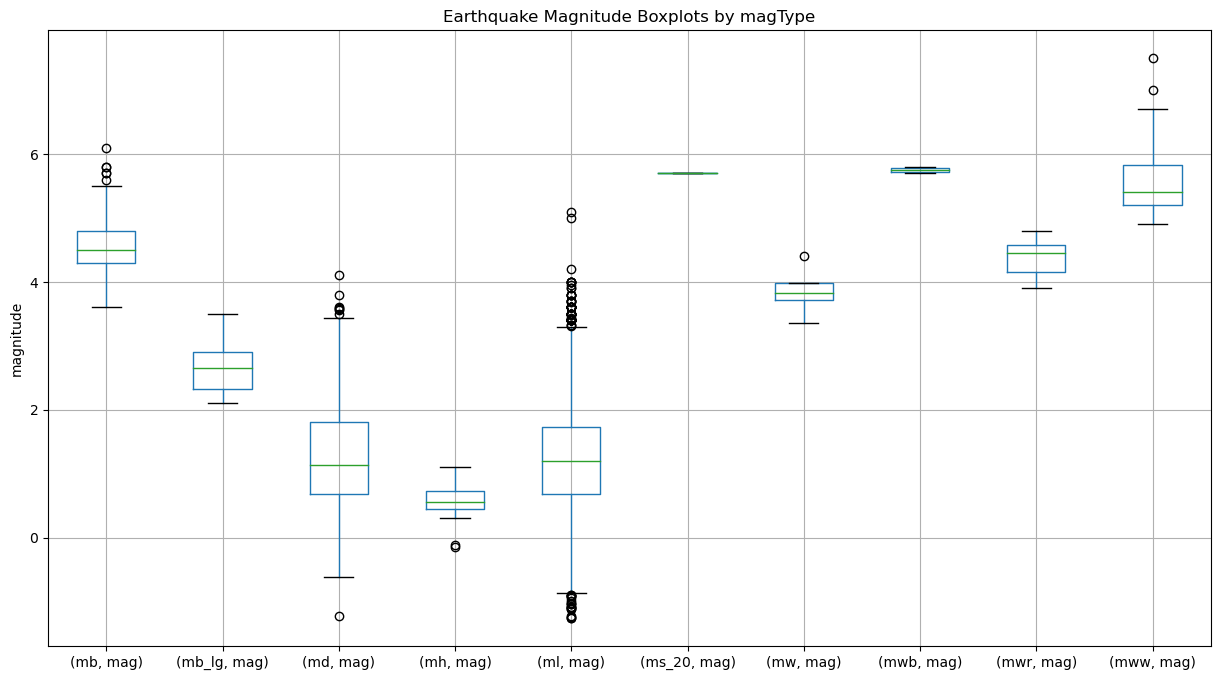

In [41]:
quakes[['mag', 'magType']].groupby('magType').boxplot(figsize=(15, 8), subplots=False)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude')  # label the y-axis
plt.show()


### Counts and Frequencies

#### Bar Charts

With pandas, we have the option of using the `kind` argument or using `plot.<kind>()`. Let's use `plot.bar()` here to show the evolution of monthly volume traded in Facebook stock over time:


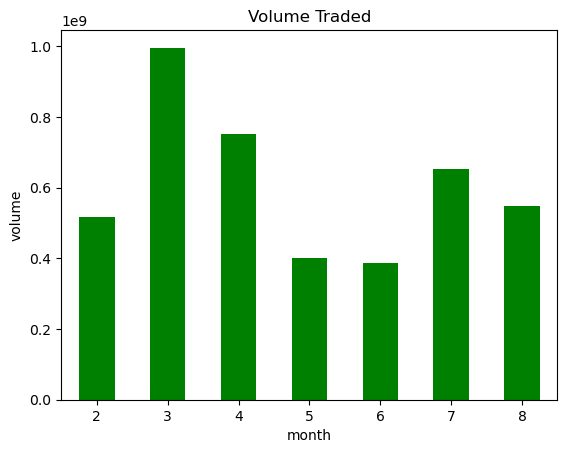

In [43]:
fb['2018-02':'2018-08'].assign(month=lambda x: x.index.month).groupby('month').sum().volume.plot.bar(color='green', rot=0, title='Volume Traded')
plt.ylabel('volume')  # label the y-axis
plt.show()


We can also change the orientation of the bars. Passing `kind='barh'` gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for earthquakes in our data:

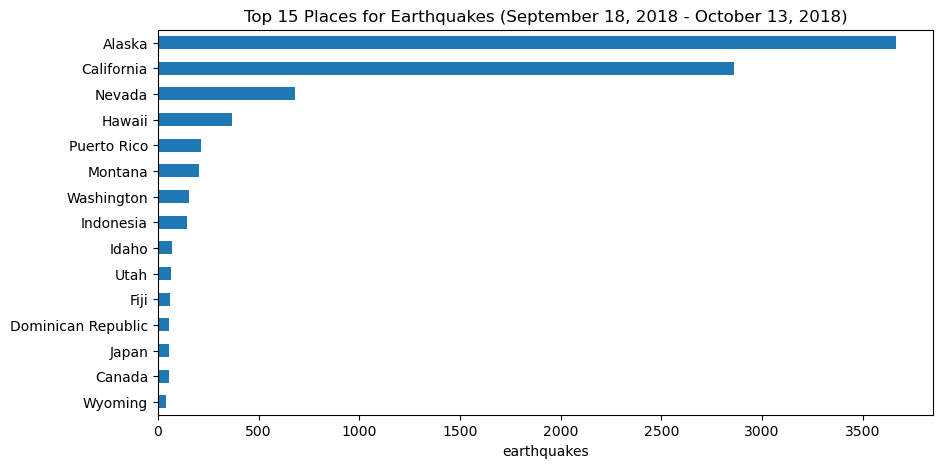

In [45]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(kind='barh', figsize=(10, 5), title='Top 15 Places for Earthquakes (September 18, 2018 - October 13, 2018)')
plt.xlabel('earthquakes')  # label the x-axis
plt.show()



We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:


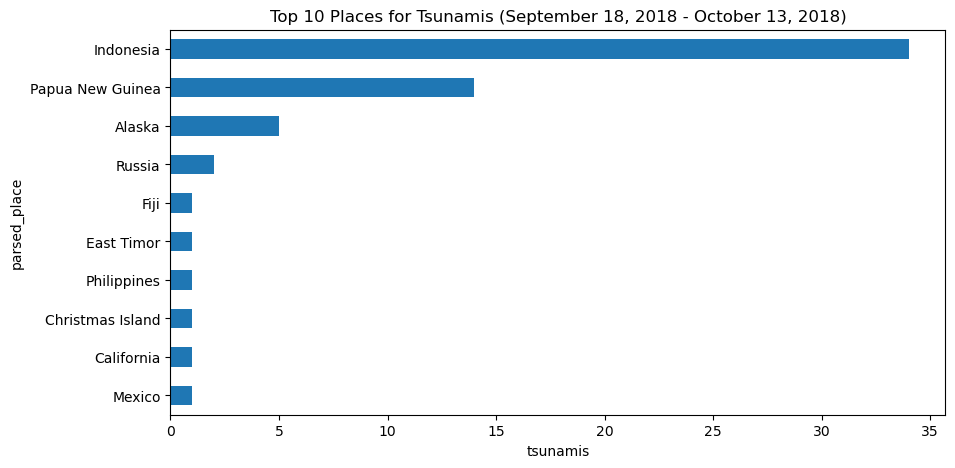

In [46]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(kind='barh', figsize=(10, 5), title='Top 10 Places for Tsunamis (September 18, 2018 - October 13, 2018)')
plt.xlabel('tsunamis')  # label the x-axis
plt.show()


Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look at how many earthquakes and tsunamis Indonesia gets on a daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here:


C:\Users\ryzek\AppData\Local\Temp\ipykernel_13452\706290040.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(time=lambda x: pd.to_datetime(x.time, unit='ms'), earthquake=1).set_index('time').resample('1D').sum()


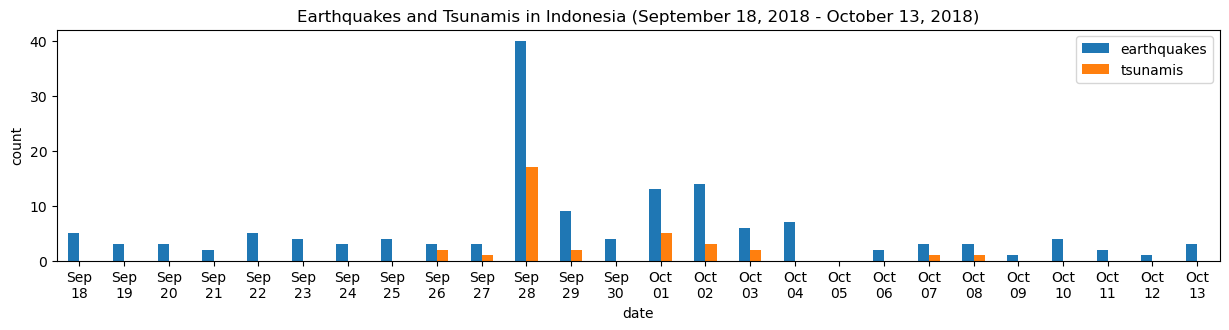

In [47]:

indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(time=lambda x: pd.to_datetime(x.time, unit='ms'), earthquake=1).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0, label=['earthquakes', 'tsunamis'], title='Earthquakes and Tsunamis in Indonesia (September 18, 2018 - October 13, 2018)')
# Label the axes
plt.xlabel('date')
plt.ylabel('count')
plt.show()


Using the `kind` argument for vertical bars when the labels for each bar are shorter:


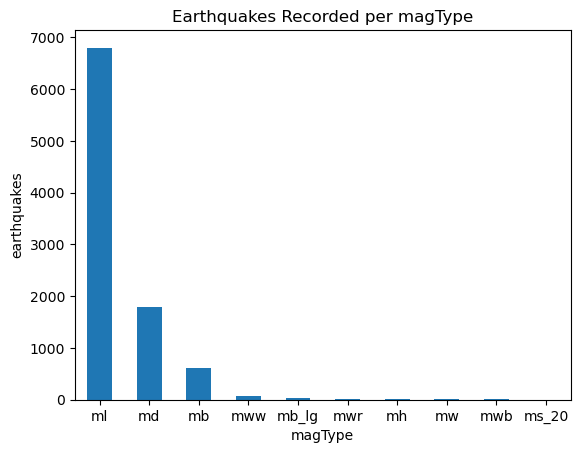

In [48]:
quakes.magType.value_counts().plot(kind='bar', title='Earthquakes Recorded per magType', rot=0)
# Label the axes
plt.xlabel('magType')
plt.ylabel('earthquakes')
plt.show()


Top 4 places with earthquakes:



#### Stacked Bar Chart

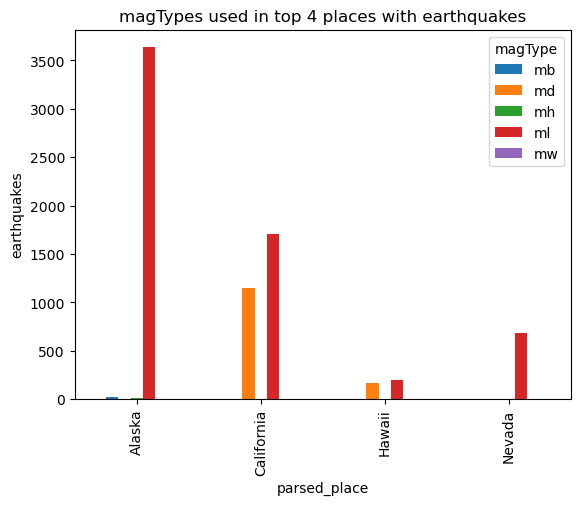

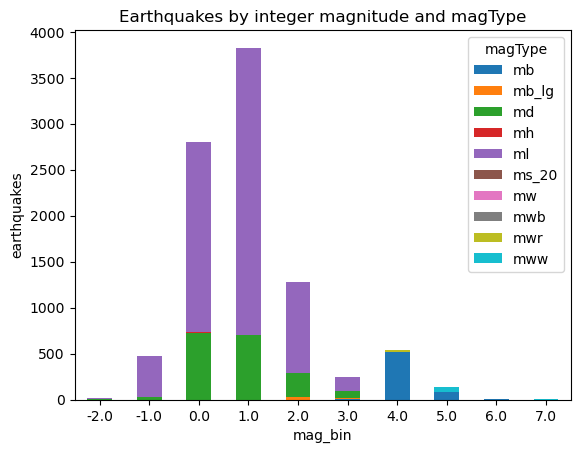

In [51]:
quakes[quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(title='magTypes used in top 4 places with earthquakes')
plt.ylabel('earthquakes')  # label the axes
plt.show()

pivot = quakes.assign(mag_bin=lambda x: np.floor(x.mag)).pivot_table(index='mag_bin', columns='magType', values='mag', aggfunc='count')
pivot.plot.bar(stacked=True, rot=0, title='Earthquakes by integer magnitude and magType')
plt.ylabel('earthquakes')  # label the axes
plt.show()

#### Normalized Stacked Bars

Plot the percentages to be better able to see the different `magTypes`.

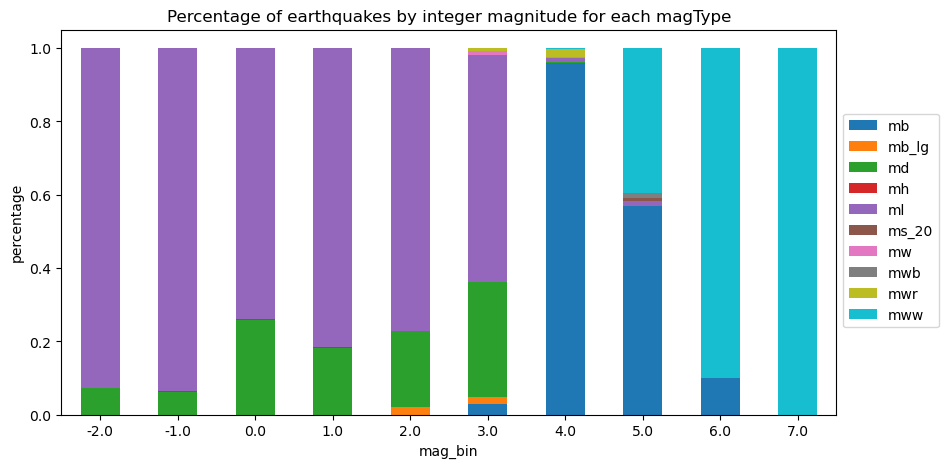

In [50]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(stacked=True, rot=0, figsize=(10, 5), title='Percentage of earthquakes by integer magnitude for each magType')
ax.legend(bbox_to_anchor=(1, 0.8))  # move legend to the right of the plot
plt.ylabel('percentage')  # label the axes
plt.show()

## 9.1.3 Pandas Plotting Subpackage





Pandas provides some extra plotting functions for a few select plot types.

### About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018.

### Setup

#### Scatter Matrix


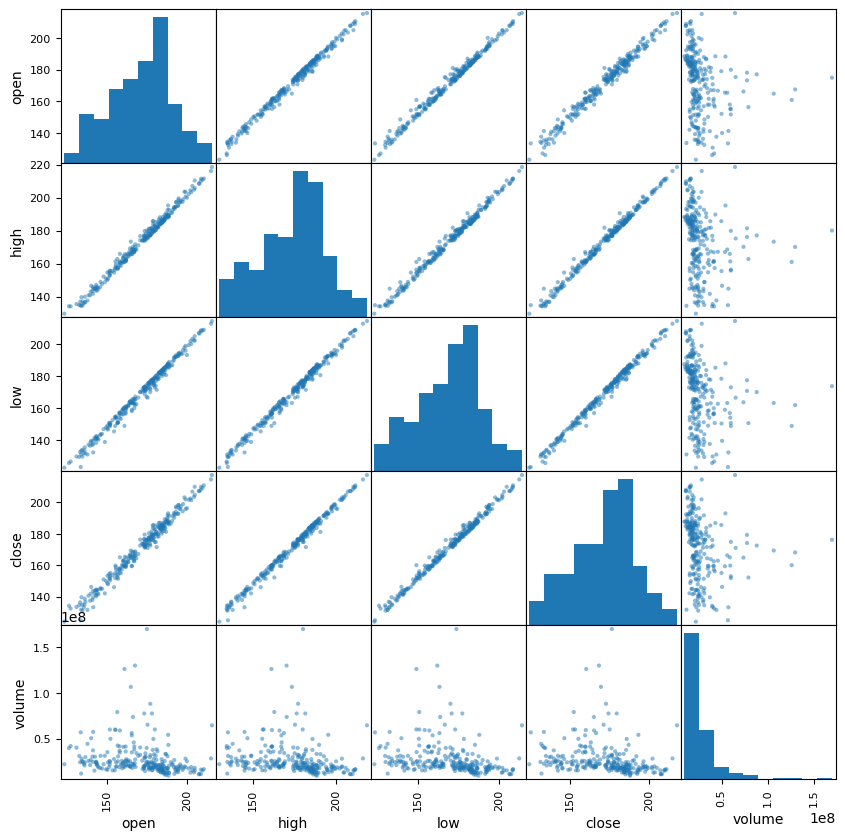

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

# Import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))
plt.show()



Changing the diagonal from histograms to KDE:


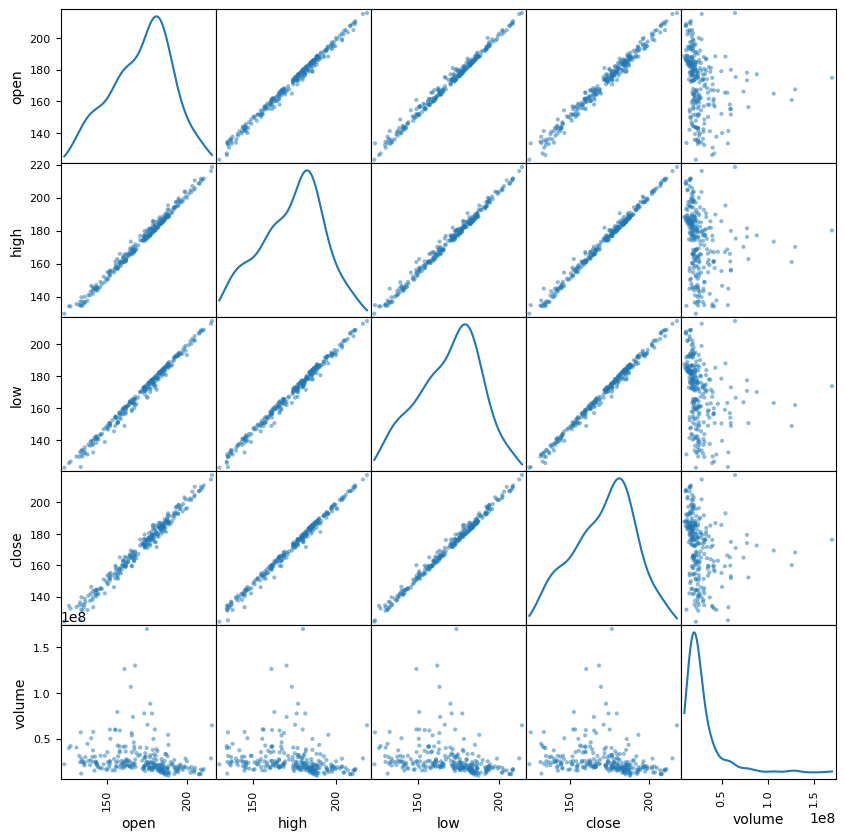

In [54]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()



#### Lag Plot

Lag plots let us see how the variable correlates with past observations of itself. Random data has no pattern:



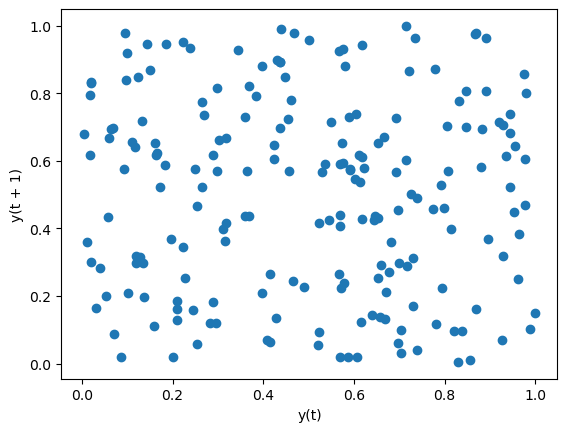

In [55]:

from pandas.plotting import lag_plot

np.random.seed(0)  # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))
plt.show()




Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:


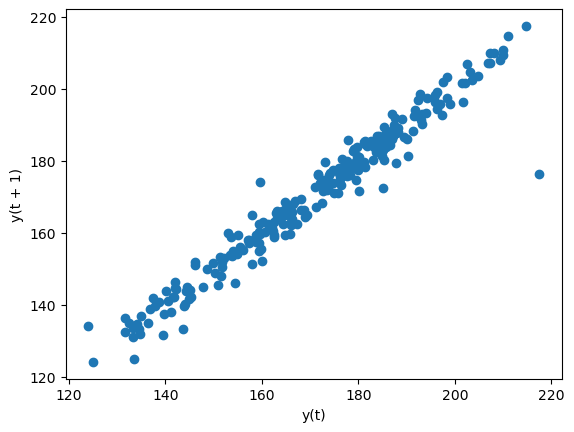

In [56]:

lag_plot(fb.close)
plt.show()




The default lag is 1, but we can alter this with the `lag` parameter. Let's look at a 5-day lag (a week of trading activity):


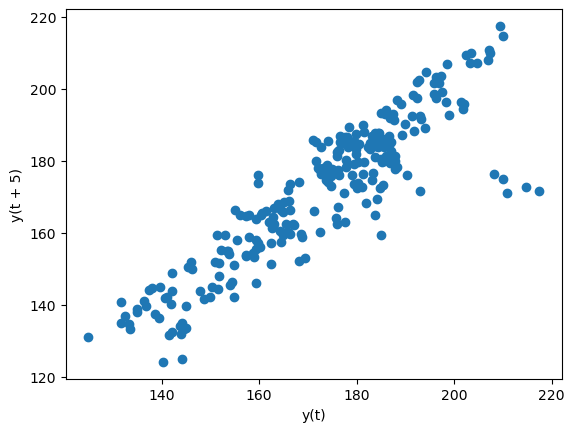

In [57]:
lag_plot(fb.close, lag=5)
plt.show()

#### Autocorrelation Plots

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):


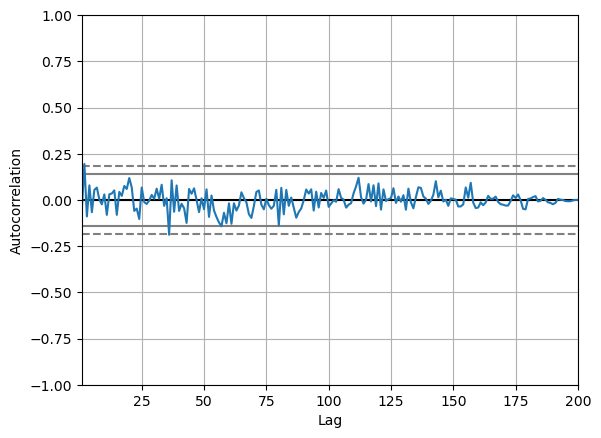

In [59]:
from pandas.plotting import autocorrelation_plot

np.random.seed(0)  # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()




Stock data, on the other hand, does have significant autocorrelation:


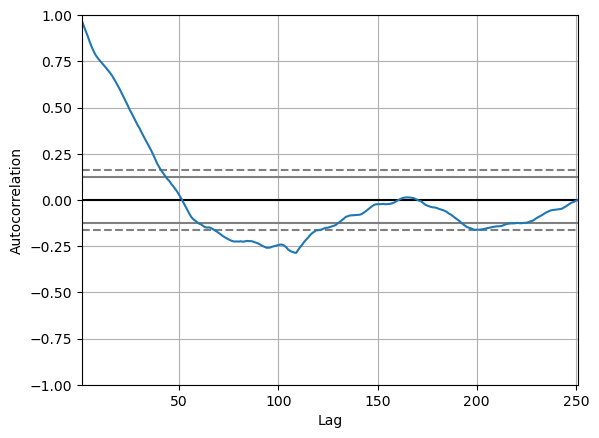

In [60]:

autocorrelation_plot(fb.close)
plt.show()




#### Bootstrap Plot

This plot helps us understand the uncertainty in our summary statistics:


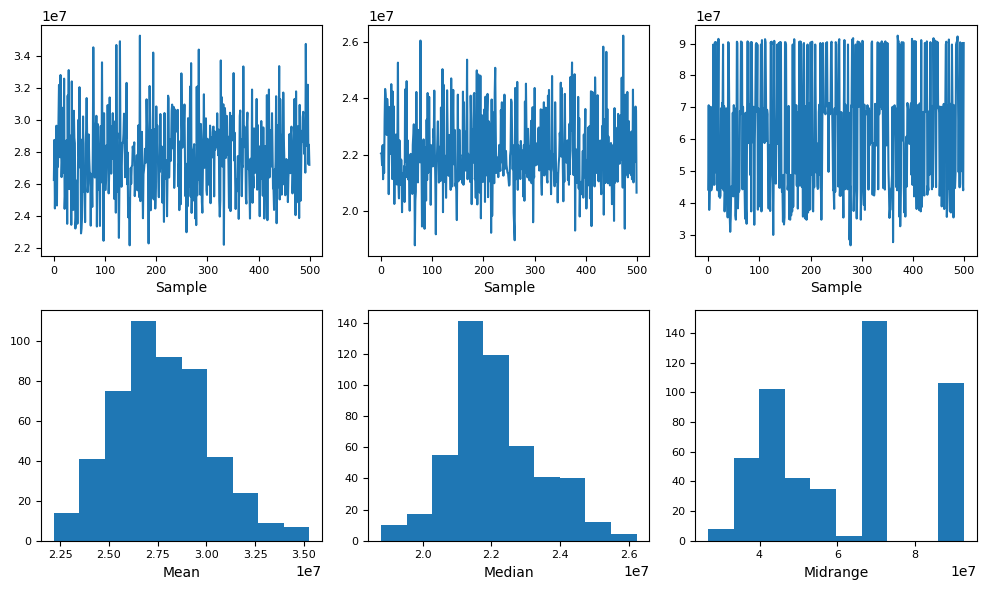

In [61]:

from pandas.plotting import bootstrap_plot

fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()

## 9.1.4 Data Analysis


The procedures demonstrated provide valuable insights into data visualization using the pandas plotting subpackage. The scatter matrix reveals relationships between multiple variables simultaneously, making it easier to spot correlations and patterns. Changing the diagonal to KDE offers a smoother representation of data distributions. Lag and autocorrelation plots help identify patterns in time series data, showing significant self-correlation in stock prices, which is typical due to market trends and behaviors. Finally, the bootstrap plot offers a way to visualize the uncertainty in summary statistics, providing a clearer understanding of data variability and confidence intervals.








## 9.1.5 Supplementary Activity

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV files
fb_stock_data = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquake_data = pd.read_csv('earthquakes.csv')


#### 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas `plot()` method.

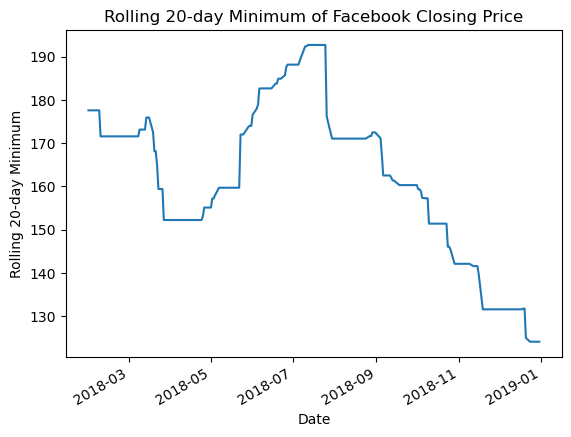

In [68]:
# Calculate the rolling 20-day minimum of the Facebook closing price
fb_stock_data['rolling_20_min'] = fb_stock_data['close'].rolling(window=20).min()

# Plot the rolling 20-day minimum
fb_stock_data['rolling_20_min'].plot(title='Rolling 20-day Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Rolling 20-day Minimum')
plt.show()

#### 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

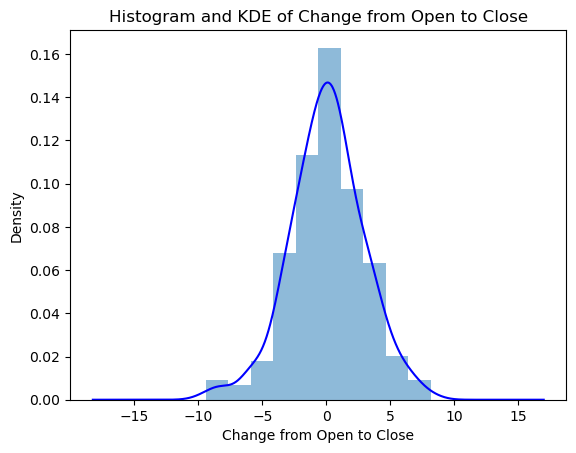

In [70]:
# Calculate the change from open to close
fb_stock_data['change'] = fb_stock_data['close'] - fb_stock_data['open']

# Plot histogram and KDE of the change

fb_stock_data['change'].plot(kind='hist', density=True, alpha=0.5, title='Histogram and KDE of Change from Open to Close')
fb_stock_data['change'].plot(kind='kde', color='blue')
plt.xlabel('Change from Open to Close')
plt.show()

#### 3. Using the earthquake data, create box plots for the magnitudes of each `magType` used in Indonesia.

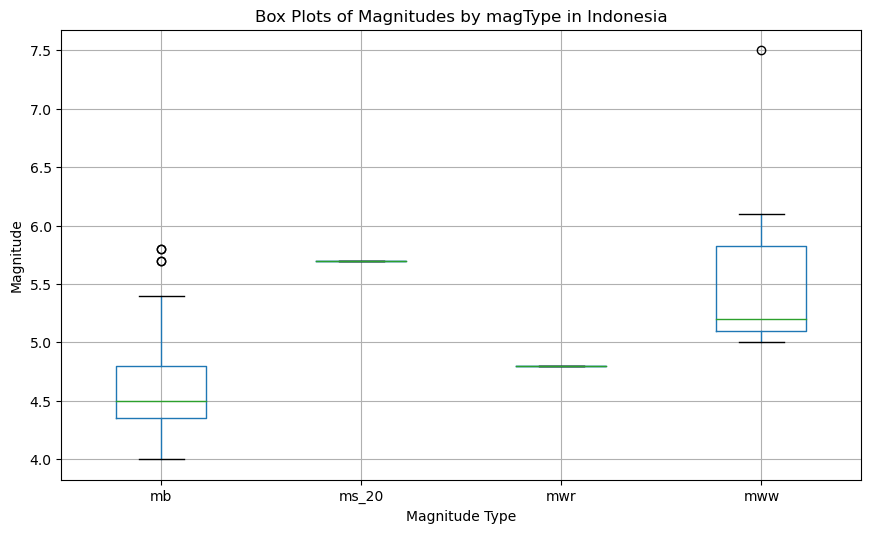

In [71]:
# Filter earthquake data for Indonesia
indonesia_quakes = earthquake_data[earthquake_data['parsed_place'] == 'Indonesia']

# Create box plots for the magnitudes of each magType
indonesia_quakes.boxplot(column='mag', by='magType', figsize=(10, 6))
plt.title('Box Plots of Magnitudes by magType in Indonesia')
plt.suptitle('')
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.show()

#### 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

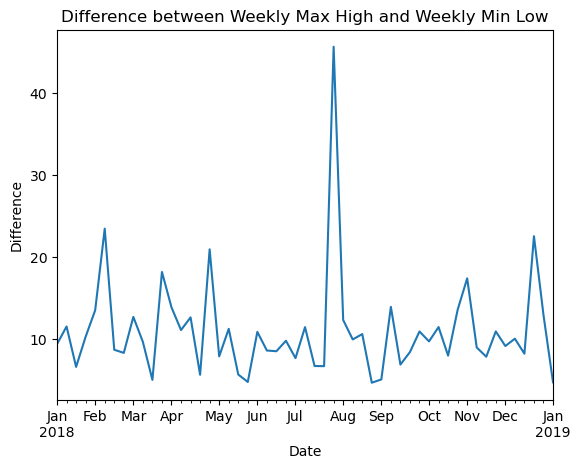

In [72]:
# Resample data to weekly and calculate the weekly max high and min low
weekly_data = fb_stock_data.resample('W').agg({'high': 'max', 'low': 'min'})
weekly_data['high_low_diff'] = weekly_data['high'] - weekly_data['low']

# Plot the difference between the weekly max high and min low
weekly_data['high_low_diff'].plot(title='Difference between Weekly Max High and Weekly Min Low')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

#### 5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

The second subplot will be a bar plot showing the net effect this had monthly, using `resample()`.

Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

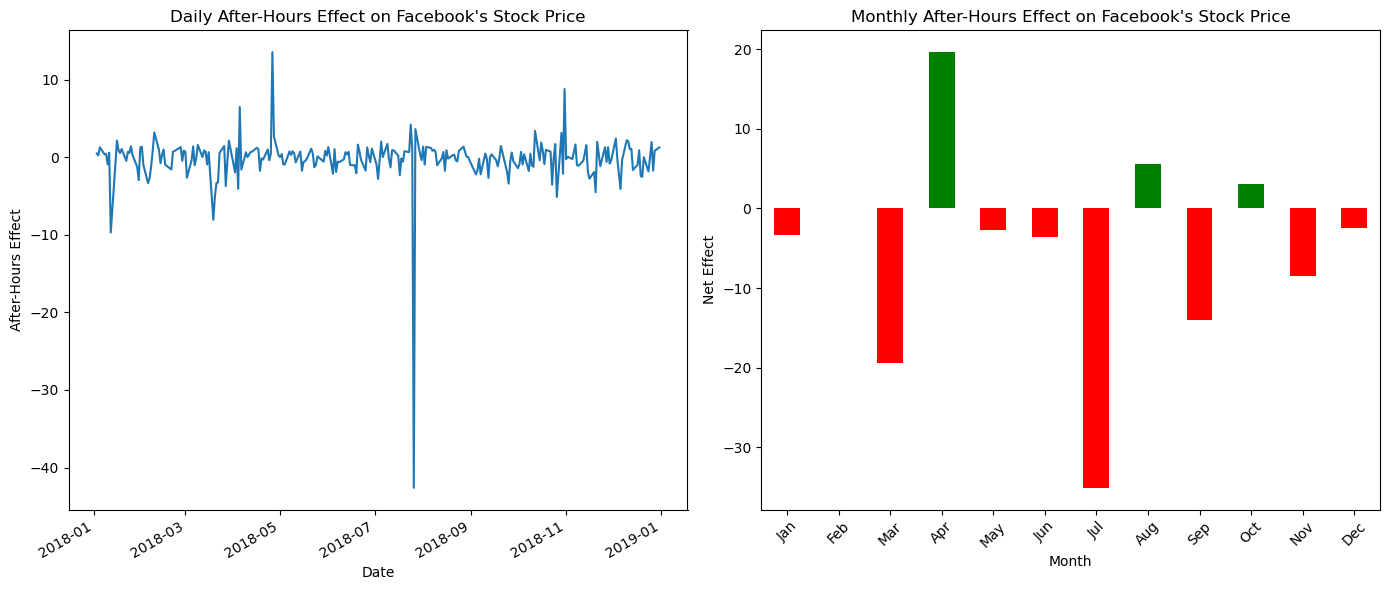

In [73]:
# Calculate the daily difference between the opening price and the prior day's closing price
fb_stock_data['prior_close'] = fb_stock_data['close'].shift(1)
fb_stock_data['after_hours_effect'] = fb_stock_data['open'] - fb_stock_data['prior_close']

# Resample the data to monthly and sum the after-hours effects
monthly_effect = fb_stock_data['after_hours_effect'].resample('M').sum()

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: line plot of the daily after-hours effect
fb_stock_data['after_hours_effect'].plot(ax=axes[0], title="Daily After-Hours Effect on Facebook's Stock Price")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('After-Hours Effect')

# Second subplot: bar plot of the monthly net effect
colors = ['green' if val > 0 else 'red' for val in monthly_effect]
monthly_effect.plot(kind='bar', ax=axes[1], color=colors, title="Monthly After-Hours Effect on Facebook's Stock Price")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].set_xticklabels([date.strftime('%b') for date in monthly_effect.index], rotation=45)

plt.tight_layout()
plt.show()

## Summary


In this activity, we explored various plotting techniques using the pandas plotting subpackage and matplotlib. We calculated and visualized rolling minimums, changes in stock prices, and differences in weekly highs and lows for Facebook stock. We also created box plots for earthquake magnitudes in Indonesia and examined the effect of after-hours trading on stock prices. These exercises demonstrated the power of pandas and matplotlib for analyzing and visualizing time series data, highlighting patterns and trends that can inform better decision-making.